# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from xgboost import XGBClassifier, plot_importance
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the dataset
health_df = pd.read_csv('/content/drive/MyDrive/PROJECT Health insurance /TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [4]:
health_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# basic information about the dataset
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


The Dataset consist of 381109 entries with 12 features

Out of these 12 features, 9 are numeric while 3 are of object type.

In [ ]:
# checking for the duplicate values
health_df.duplicated().sum()

269

In [7]:
# dropping the duplicate records from the dataset
health_df.drop_duplicates(inplace=True)

In [8]:
# Now there are no duplicate records
health_df.duplicated().sum()

0

   **Luckily, the dataset doesn't have any feature with Null Values!!!**

In [9]:
# checking for the Null Values
health_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

   **Luckily, the dataset doesn't have any feature with Null Values!!!**

In [10]:
health_df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [11]:
# dropping the not required 'id' column
health_df.drop('id', inplace=True,axis=1)

##Univariate Analysis

In [12]:
# Target Variable
health_df['Response'].value_counts()


0    334399
1     46710
Name: Response, dtype: int64

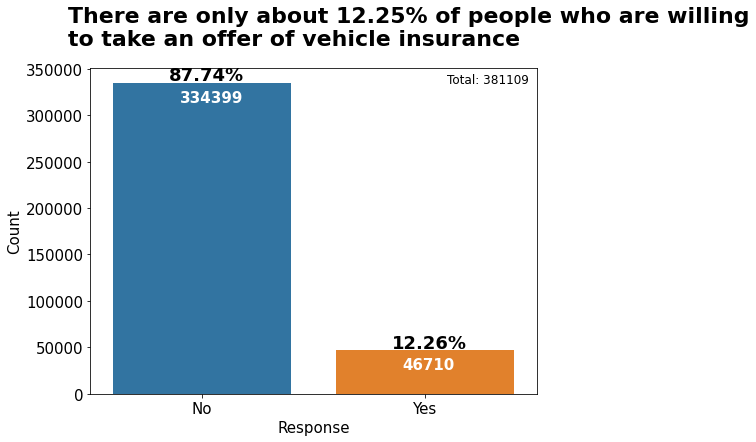

In [13]:
#Response

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot('Response', data = health_df, ax = ax)
plt.xticks(ticks = [0, 1], labels = ['No','Yes'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Response',fontsize=15)
plt.ylabel(ylabel = 'Count',fontsize=15)

percentage_response = []
count = []
count.append(health_df['Response'].value_counts().reset_index()['Response'][0])
count.append(health_df['Response'].value_counts().reset_index()['Response'][1])
total = sum(count)
percentage_response.append(count[0]/(count[0]+count[1]) * 100)
percentage_response.append(count[1]/(count[0]+count[1]) * 100)

for i in range(0,len(percentage_response)):
    plt.text(x = i - 0.10
             , y = count[i] - 20000
             , s=str(round(count[i]))
             , fontsize=15 
             , fontweight='bold'
             , color = 'white')
    plt.text(x = i - 0.15
             , y = count[i] + 3000
             , s=str(round(percentage_response[i], 2)) + '%'
             , fontsize=18 
             , fontweight='bold')
plt.text(x =1.1, y= 335000, s = 'Total: ' + str(total), fontsize = 12)

plt.text(x =-0.6, y= 400000, s = 'There are only about 12.25% of people who are willing', fontweight = 'bold', fontsize = 22)
plt.text(x =-0.6, y= 375000, s = 'to take an offer of vehicle insurance', fontweight = 'bold', fontsize = 22)

plt.savefig('responsecount.png', bbox_inches = 'tight')

As we can see the Male Policyholders are more(slightly) than Female policyholders

#Check Columns (Categorical or Numeric)


In [14]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    It gives the names of categorical, numerical, and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
        cat_th: int, optional
                the class threshold for numeric but categorical variables
        car_th: int, optinal
                the class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical Variables List
        num_cols: list
                Numeric Variables List
        cat_but_car: list
                Categorical but cardinal variables list

                  Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is in cat_cols

    """

     # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(health_df)

Observations: 381109
Variables: 11
cat_cols: 6
num_cols: 5
cat_but_car: 0
num_but_cat: 3


In [15]:
cat_cols

['Gender',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Driving_License',
 'Previously_Insured',
 'Response']

In [16]:
num_cols = [col for col in num_cols if "id" not in col]
num_cols = [col for col in num_cols if "Policy_Sales_Channel" not in col]

Univarient Analysis

        Gender     Ratio
Male    206089  54.07613
Female  175020  45.92387


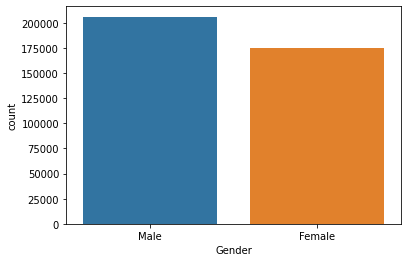

           Vehicle_Age      Ratio
1-2 Year        200316  52.561341
< 1 Year        164786  43.238549
> 2 Years        16007   4.200111


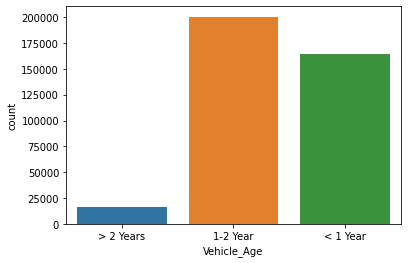

     Vehicle_Damage      Ratio
Yes          192413  50.487656
No           188696  49.512344


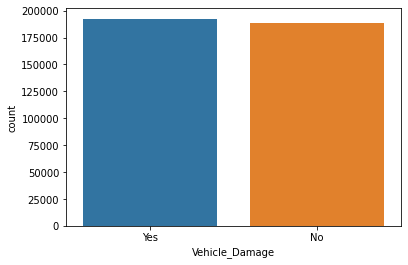

   Driving_License      Ratio
1           380297  99.786938
0              812   0.213062


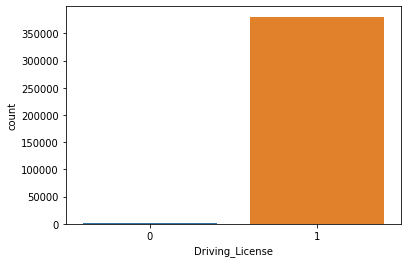

   Previously_Insured      Ratio
0              206481  54.178988
1              174628  45.821012


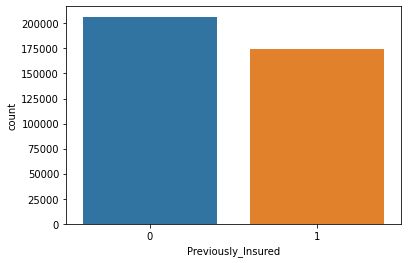

   Response      Ratio
0    334399  87.743664
1     46710  12.256336


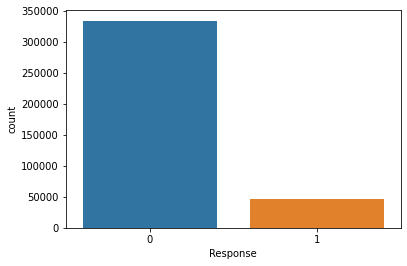

In [17]:
# SUMMARY CATEGORICAL COLUMNS
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for i in cat_cols:
    cat_summary(health_df, i, plot=True)

#Observation

*   In this  above graph response 88% not responce . 12% people responce
*    Previously_Insured Ratio Not insurance 54.178988
  46 % people are already haveing insurance
* 99.8% people have Driving licence
*     Vehicle_Age  persentage age wise 1-2 Year , 52.3% ,< 1 Year   43.4%,   < 2 Years 4.2%
*  most of the gender ratio male 56% and female 46%



count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
5%           21.000000
10%          22.000000
20%          24.000000
30%          25.000000
40%          29.000000
50%          36.000000
60%          42.000000
70%          47.000000
80%          53.000000
90%          62.000000
95%          69.000000
99%          77.000000
max          85.000000
Name: Age, dtype: float64


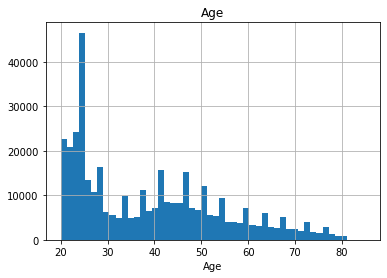

#####################################
count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
5%            5.000000
10%           8.000000
20%          11.000000
30%          18.000000
40%          28.000000
50%          28.000000
60%          28.000000
70%          31.000000
80%          39.000000
90%          46.000000
95%          47.000000
99%          50.000000
max          52.000000
Name: Region_Code, dtype: float64


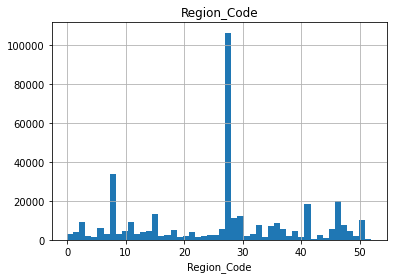

#####################################
count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
5%         2630.000000
10%        2630.000000
20%       21583.600000
30%       26238.000000
40%       29082.000000
50%       31669.000000
60%       34406.000000
70%       37548.000000
80%       41711.000000
90%       48431.000000
95%       55176.000000
99%       72963.000000
max      540165.000000
Name: Annual_Premium, dtype: float64


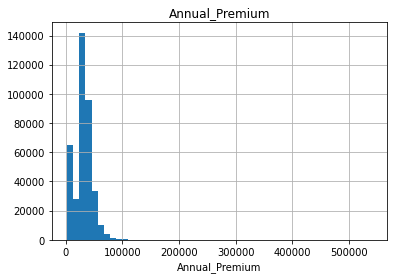

#####################################
count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
5%           24.000000
10%          38.000000
20%          68.000000
30%          96.000000
40%         125.000000
50%         154.000000
60%         183.000000
70%         212.000000
80%         241.000000
90%         270.000000
95%         285.000000
99%         297.000000
max         299.000000
Name: Vintage, dtype: float64


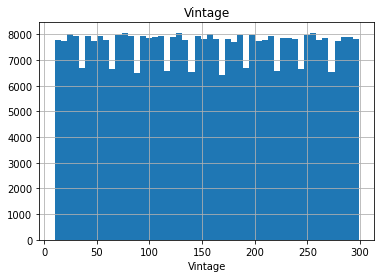

#####################################


In [18]:
# SUMMARY NUMERIC COLUMNS
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")

for col in num_cols:
    num_summary(health_df, col, plot=True)

In [19]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [20]:
for col in num_cols:
    target_summary_with_num(health_df, "Response", col)

                Age
Response           
0         38.178227
1         43.435560


          Region_Code
Response             
0           26.336544
1           26.762963


          Annual_Premium
Response                
0           30419.160276
1           31604.092742


             Vintage
Response            
0         154.380243
1         154.112246




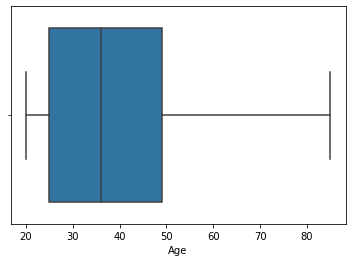

In [21]:
sns.boxplot(x=health_df["Age"])

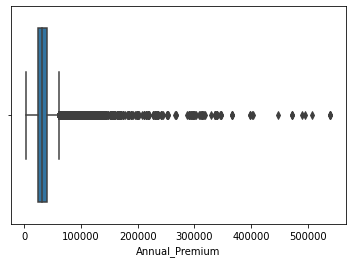

In [22]:
sns.boxplot(x=health_df["Annual_Premium"])

This Anual premiun are most many outliear

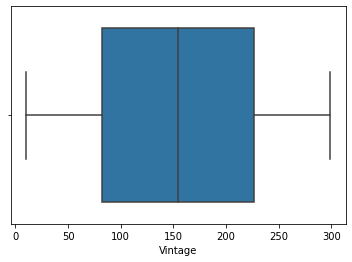

In [23]:
sns.boxplot(x=health_df["Vintage"])

Gender-Response Visualization


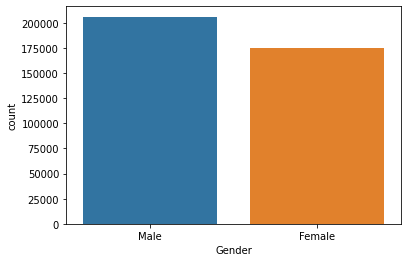

In [24]:
sns.countplot(health_df.Gender)

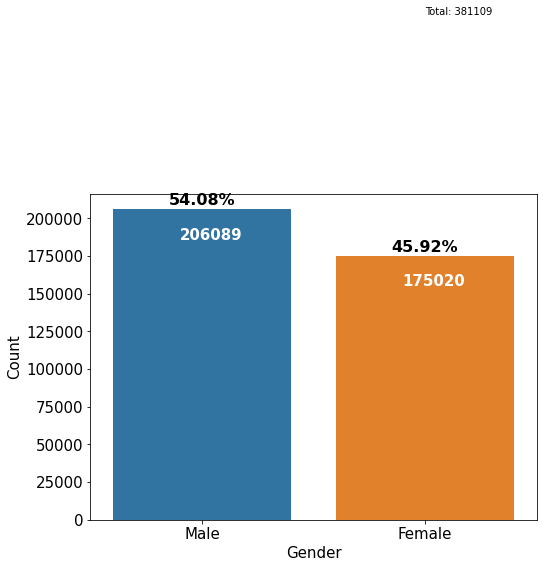

In [25]:

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot('Gender', data = health_df, ax = ax)
plt.xticks(ticks = [0, 1], labels = ['Male','Female'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Gender',fontsize=15)
plt.ylabel(ylabel = 'Count',fontsize=15)

percentage_response = []
count = []
count.append(health_df['Gender'].value_counts().reset_index()['Gender'][0])
count.append(health_df['Gender'].value_counts().reset_index()['Gender'][1])
total = sum(count)
percentage_response.append(count[0]/(count[0]+count[1]) * 100)
percentage_response.append(count[1]/(count[0]+count[1]) * 100)

for i in range(0,len(percentage_response)):
    plt.text(x = i - 0.10
             , y = count[i] - 20000
             , s=str(round(count[i]))
             , fontsize=15
             , fontweight='bold'
             , color = 'white')
    plt.text(x = i - 0.15
             , y = count[i] + 3000
             , s=str(round(percentage_response[i], 2)) + '%'
             , fontsize=16
             , fontweight='bold')
plt.text(x =1, y= 335000, s = 'Total: ' + str(total), fontsize = 10)
plt.savefig('responsecount.png', bbox_inches = 'tight')

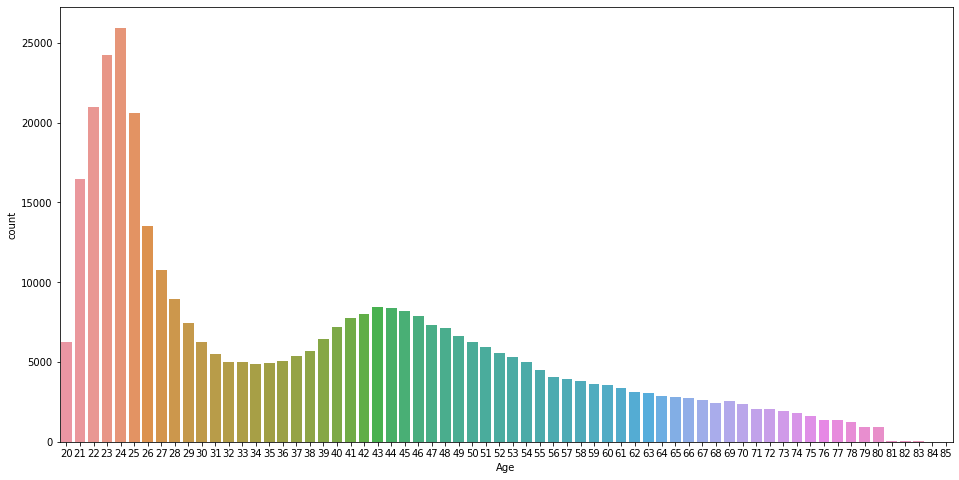

In [26]:
# plotting the Age column 
plt.figure(figsize=(16,8))
sns.countplot(health_df['Age']);

*   **The Age of policyholders ranges from 20 to 80.**



1    380297
0       812
Name: Driving_License, dtype: int64

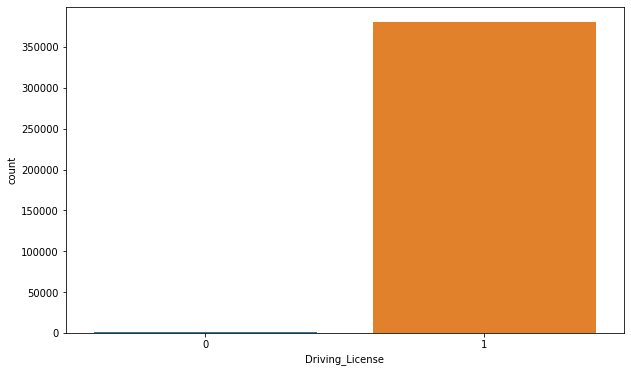

In [27]:
# plotting the Driving_License column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Driving_License']);
health_df['Driving_License'].value_counts()

* **Maximum policyholders acquire a driving licence.** 

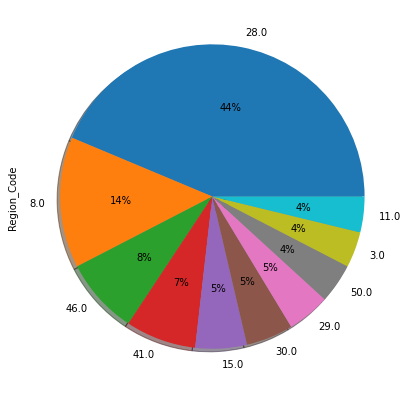

In [28]:
# plotting the Region_Code column with it's top 10 entries. 
plt.figure(figsize=(14,7))
health_df['Region_Code'].value_counts().nlargest(10).plot(kind='pie',autopct='%.0f%%',shadow = True);


* **Most of the policyholders belong to the region that has region code 28 that is 44%.**
* **second most the policyholders belong to the region that has region code 8 that is 14 %**

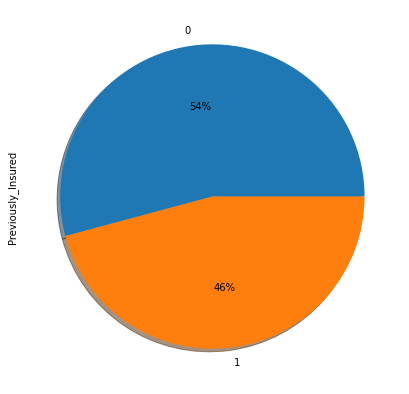

In [29]:

# plotting the Previously_Insured column 
plt.figure(figsize=(14,7))
health_df['Previously_Insured'].value_counts().plot( kind='pie',autopct='%.0f%%',shadow = True);

* **Around 54% of the customers does not have the vehicle insurance while 46% of the customers already have it.**

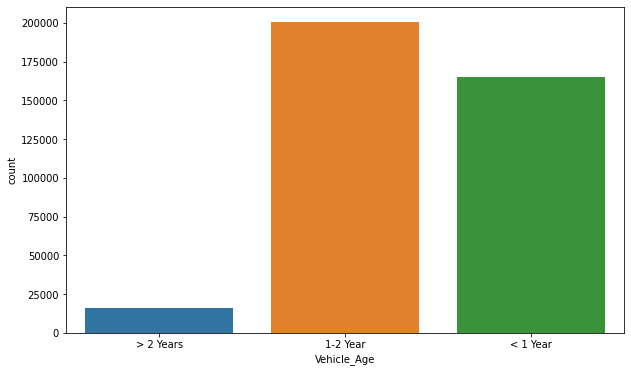

In [30]:
# plotting the Vehicle_Age column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Vehicle_Age']);

* **Most of the customers have vehicles that are 1-2 years old.**
* **Very few customers have a vehicle more than 2 years old.**

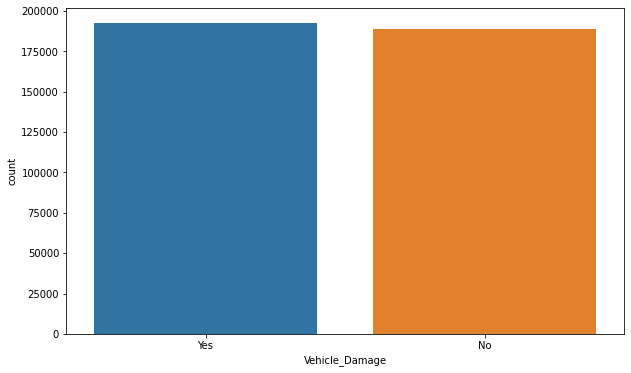

In [31]:
# plotting the Vehicle_Damage column 
plt.figure(figsize=(10,6))
sns.countplot(health_df['Vehicle_Damage']);

* **The plot shows that the number of customers who damaged their vehicles and the ones who didn't are almost equal.**

#Multivariate Analysis

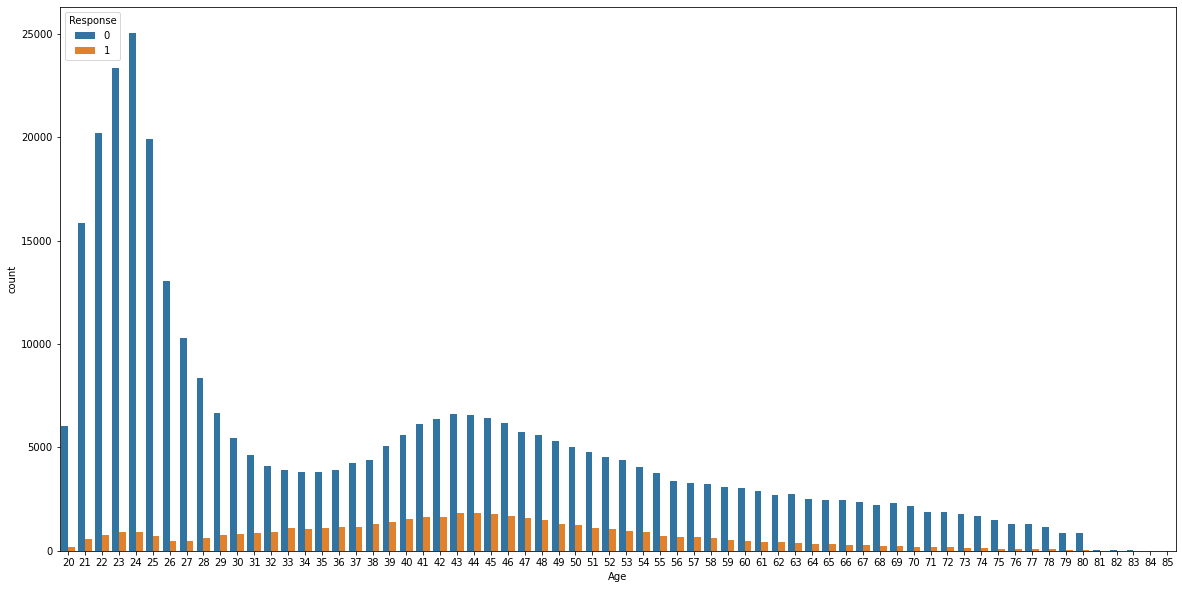

In [32]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=health_df);

* **People aged between 30-60 are more likely to be interested in the insurance policy**

Text(0.5, 1.0, 'Gender vs Response')

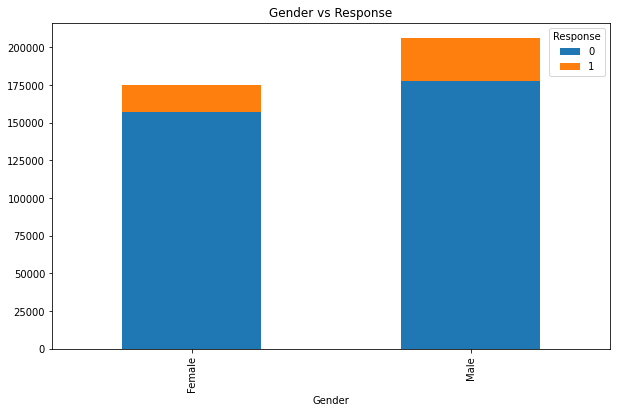

In [33]:
# Relationship b/w target variable and Gender column
ct = pd.crosstab(health_df['Gender'],health_df['Response']) 
ax = ct.plot(kind='bar',stacked=True,figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Gender vs Response')




* **The above plot shows the genderwise distribution of customers who are interested or not in the insurance policy.**
* **Male customers' proportion is higher in both types of response than Female customers**

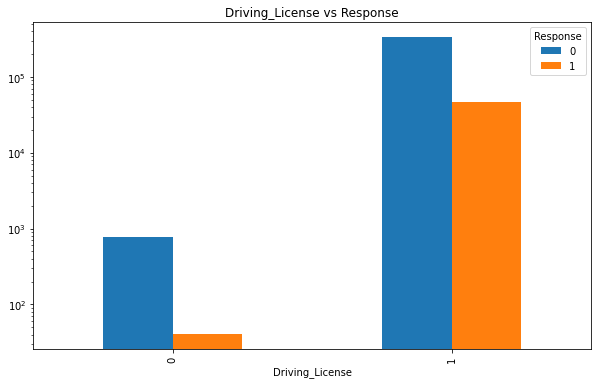

In [34]:
# Relationship b/w target variable and Driving_License column

ct = pd.crosstab(health_df['Driving_License'],health_df['Response']) 
ax = ct.plot(kind='bar',figsize=(10,6));
plt.yscale("log")
ax.legend(title='Response',loc='upper right');
plt.title('Driving_License vs Response')
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
 

* **From the customers who have D.L., only 12.3% of them are interested in insurance policy**
* **From the above plot,we can observe that 41 customers who do not have a driving licence are also interested in the insurance policy..**

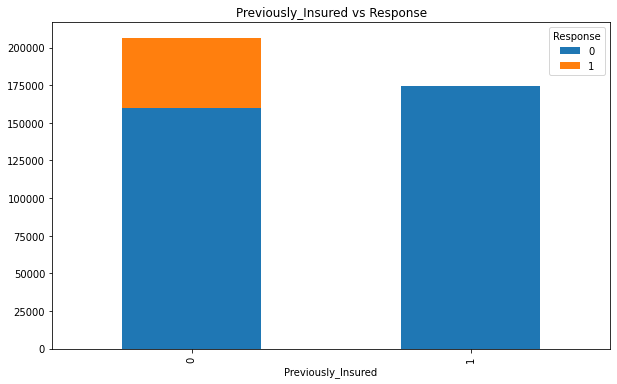

In [35]:
# Relationship b/w target variable and Previously_Insured column
ct = pd.crosstab(health_df['Previously_Insured'],health_df['Response']) 
ax = ct.plot(kind='bar',stacked=True,figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Previously_Insured vs Response')

# getting the centered labels for each bar
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  #ax.bar_label(c, labels=labels, label_type='center',fontweight='bold')


* **Of the customers who were previously not insured, 46552 of them are interested in the policy, while the majority of them are not interested.
And also, among the customers who were previously insured, the majority of them are not interested in the policy.**

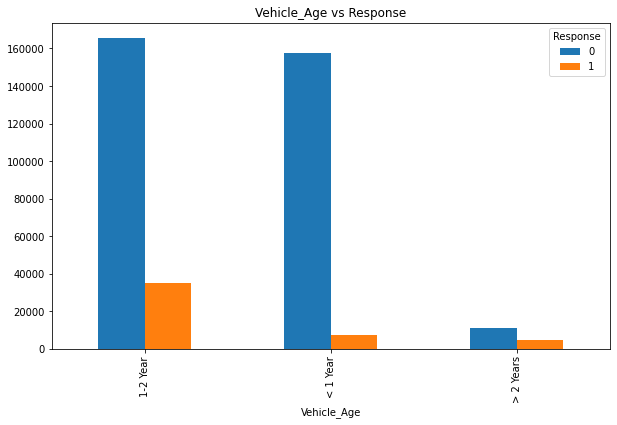

In [36]:
# Vehicle_Age
ct = pd.crosstab(health_df['Vehicle_Age'],health_df['Response']) 
ax = ct.plot(kind='bar',figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Vehicle_Age vs Response')

# getting the centered labels for each bar
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  #ax.containers(c, labels=labels, label_type='center',fontweight='bold')

* **The majority of customers interested in the insurance policy have vehicles that are 1 to 2 years old, followed by those with vehicles that are less than 1 year old.**

* **Very few customers are interested in the policy if they have more than two-year-old vehicles.** 

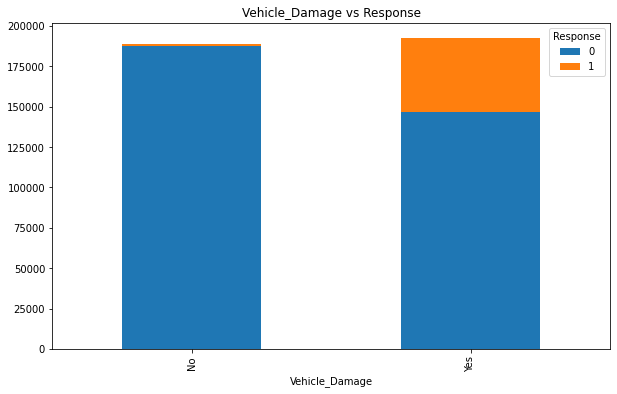

In [37]:
# Vehicle_Damage

ct = pd.crosstab(health_df['Vehicle_Damage'],health_df['Response']) 
ax = ct.plot(kind='bar',stacked=True,figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Vehicle_Damage vs Response')

# getting the centered labels for each bar
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  #ax.bar_label(c, labels=labels, label_type='center',fontweight='bold')

* **If we observe the number of customers who are interested in the insurance policy, then the maximum number of them are those who have had vehicle damage in the past.**

Text(0.5, 1.0, 'Vintage vs Annual_Premium')

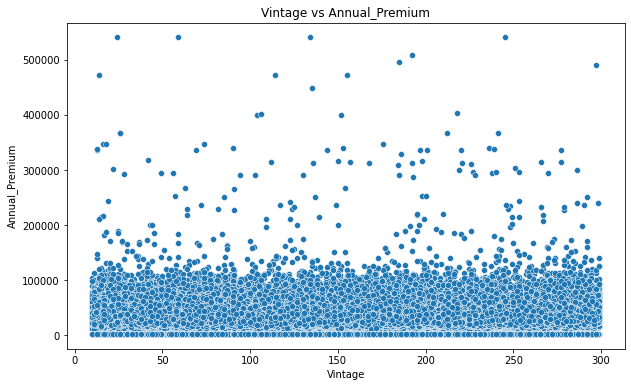

In [38]:

# number of Days, Customer has been associated with the company vs Annual premium
plt.figure(figsize=(10,6))
sns.scatterplot(x=health_df['Vintage'],y=health_df['Annual_Premium']);
plt.title('Vintage vs Annual_Premium')

* **It seems that the number of days the customer is associated with the company does not affect the amount of annual premium.**

In [39]:
numerical_features = health_df.describe().columns

In [40]:
# since these columns are categorigal in nature we will have to drop them
numerical_features=numerical_features.drop(['Response','Driving_License','Previously_Insured'])

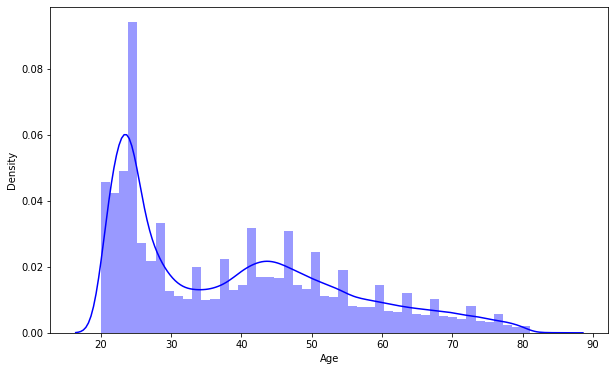

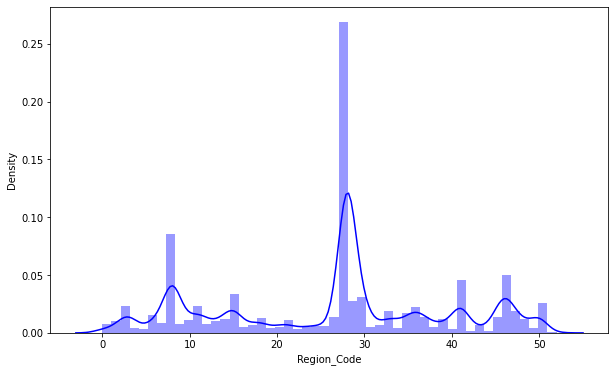

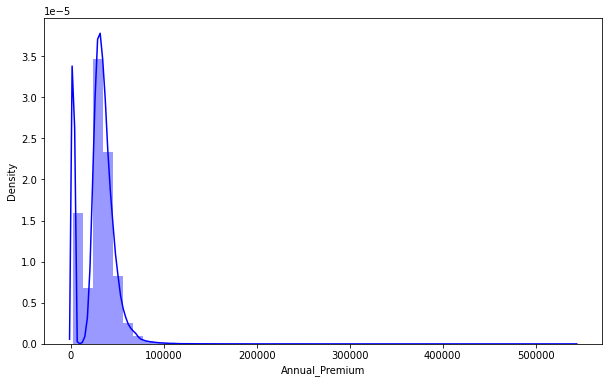

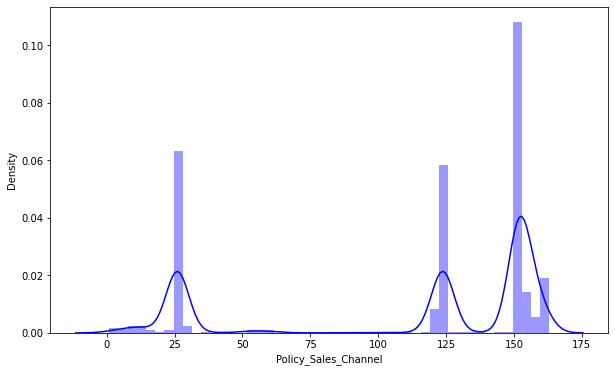

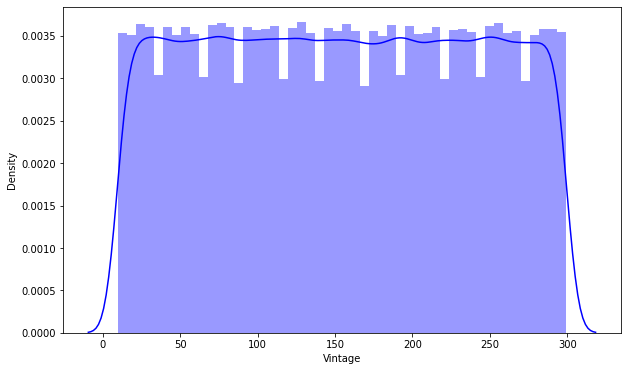

In [41]:
# plotting the numerical features
for feature in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot((health_df[feature]),color='b')
  plt.xlabel(feature)

In [42]:
#checking the outliers
Q1 = health_df.quantile(0.25)
Q3 = health_df.quantile(0.75)
IQR = Q3 - Q1

((health_df < (Q1 - 1.5 * IQR)) | (health_df > (Q3 + 1.5 * IQR))).sum()

Age                         0
Annual_Premium          10320
Driving_License           812
Gender                      0
Policy_Sales_Channel        0
Previously_Insured          0
Region_Code                 0
Response                46710
Vehicle_Age                 0
Vehicle_Damage              0
Vintage                     0
dtype: int64

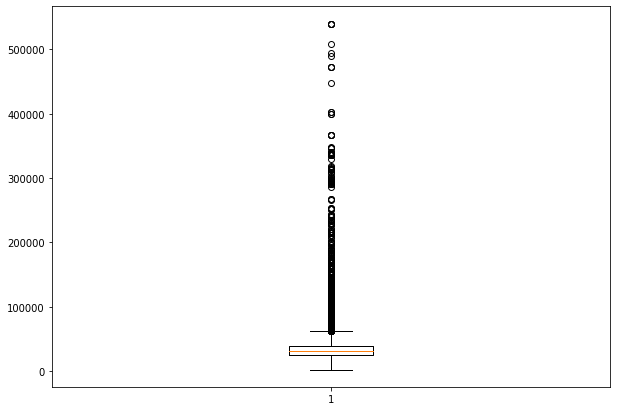

In [43]:
plt.figure(figsize=(10,7))
plt.boxplot(health_df['Annual_Premium']);

#Multivariate Analysis

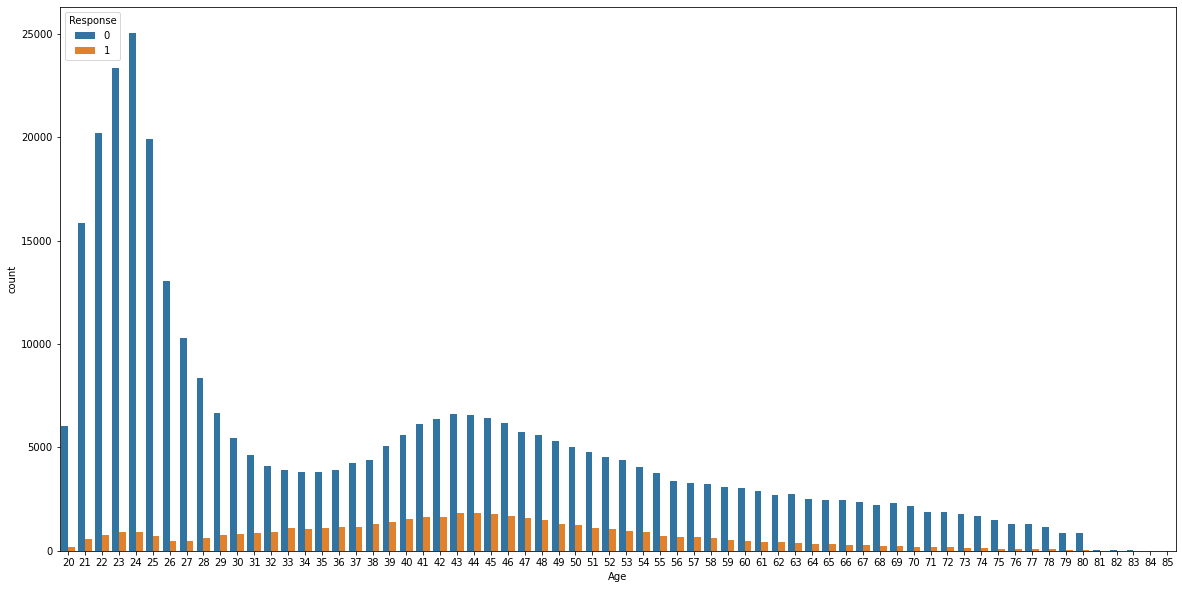

In [44]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=health_df);

* **People aged between 30-60 are more likely to be interested in the insurance policy**

Text(0.5, 1.0, 'Gender vs Response')

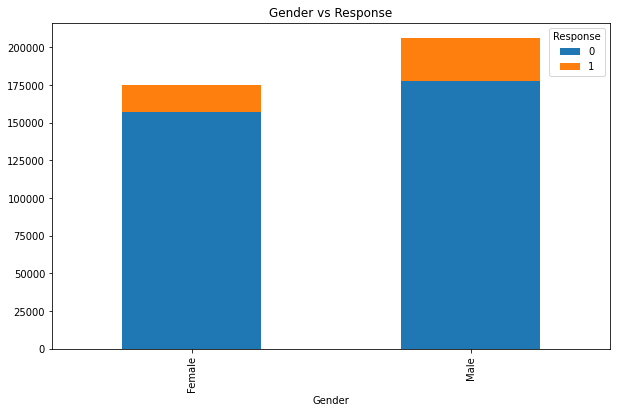

In [45]:
# Relationship b/w target variable and Gender column
ct = pd.crosstab(health_df['Gender'],health_df['Response']) 
ax = ct.plot(kind='bar',stacked=True,figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Gender vs Response')




* **The above plot shows the genderwise distribution of customers who are interested or not in the insurance policy.**
* **Male customers' proportion is higher in both types of response than Female customers**

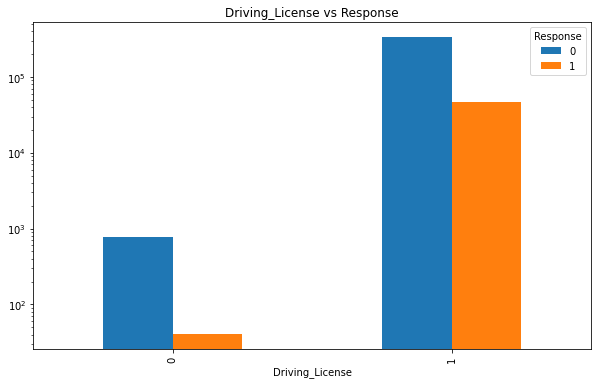

In [46]:
# Relationship b/w target variable and Driving_License column

ct = pd.crosstab(health_df['Driving_License'],health_df['Response']) 
ax = ct.plot(kind='bar',figsize=(10,6));
plt.yscale("log")
ax.legend(title='Response',loc='upper right');
plt.title('Driving_License vs Response')
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
 

* **From the customers who have D.L., only 12.3% of them are interested in insurance policy**
* **From the above plot,we can observe that 41 customers who do not have a driving licence are also interested in the insurance policy..**

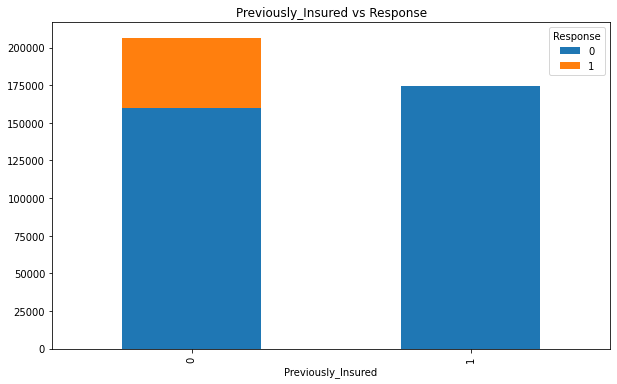

In [47]:
# Relationship b/w target variable and Previously_Insured column
ct = pd.crosstab(health_df['Previously_Insured'],health_df['Response']) 
ax = ct.plot(kind='bar',stacked=True,figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Previously_Insured vs Response')

# getting the centered labels for each bar
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  #ax.bar_label(c, labels=labels, label_type='center',fontweight='bold')


* **Of the customers who were previously not insured, 46552 of them are interested in the policy, while the majority of them are not interested.
And also, among the customers who were previously insured, the majority of them are not interested in the policy.**

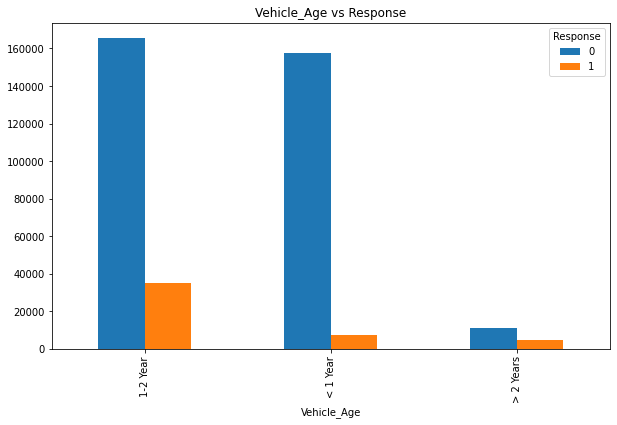

In [48]:
# Vehicle_Age
ct = pd.crosstab(health_df['Vehicle_Age'],health_df['Response']) 
ax = ct.plot(kind='bar',figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Vehicle_Age vs Response')

# getting the centered labels for each bar
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  #ax.containers(c, labels=labels, label_type='center',fontweight='bold')

* **The majority of customers interested in the insurance policy have vehicles that are 1 to 2 years old, followed by those with vehicles that are less than 1 year old.**

* **Very few customers are interested in the policy if they have more than two-year-old vehicles.** 

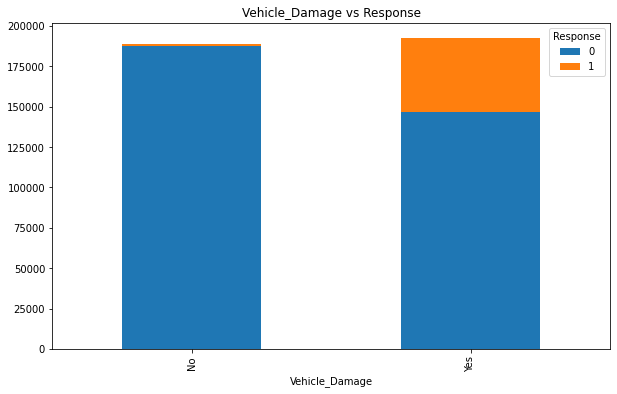

In [49]:
# Vehicle_Damage

ct = pd.crosstab(health_df['Vehicle_Damage'],health_df['Response']) 
ax = ct.plot(kind='bar',stacked=True,figsize=(10,6));
ax.legend(title='Response',loc='upper right');
plt.title('Vehicle_Damage vs Response')

# getting the centered labels for each bar
for c in ax.containers:
  labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
  #ax.bar_label(c, labels=labels, label_type='center',fontweight='bold')

* **If we observe the number of customers who are interested in the insurance policy, then the maximum number of them are those who have had vehicle damage in the past.**

Text(0.5, 1.0, 'Vintage vs Annual_Premium')

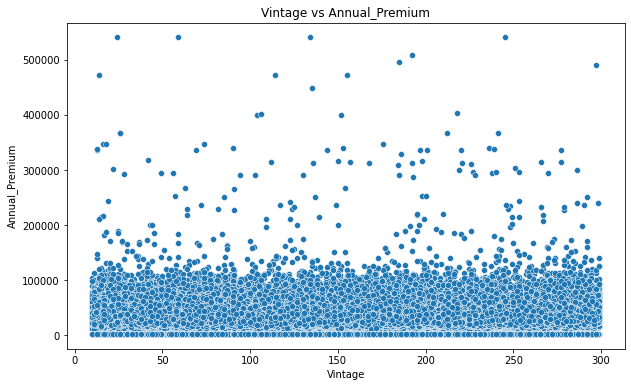

In [50]:

# number of Days, Customer has been associated with the company vs Annual premium
plt.figure(figsize=(10,6))
sns.scatterplot(x=health_df['Vintage'],y=health_df['Annual_Premium']);
plt.title('Vintage vs Annual_Premium')

* **It seems that the number of days the customer is associated with the company does not affect the amount of annual premium.**

In [51]:
numerical_features = health_df.describe().columns

In [52]:
# since these columns are categorigal in nature we will have to drop them
numerical_features=numerical_features.drop(['Response','Driving_License','Previously_Insured'])

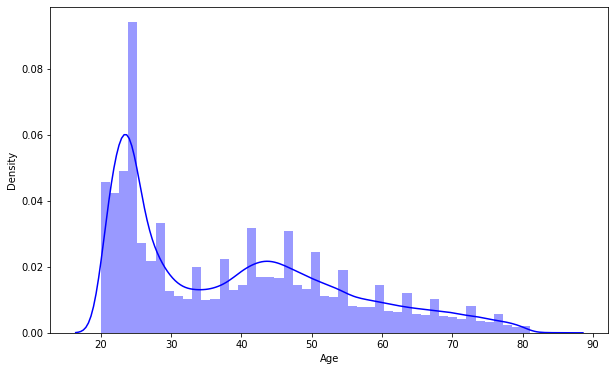

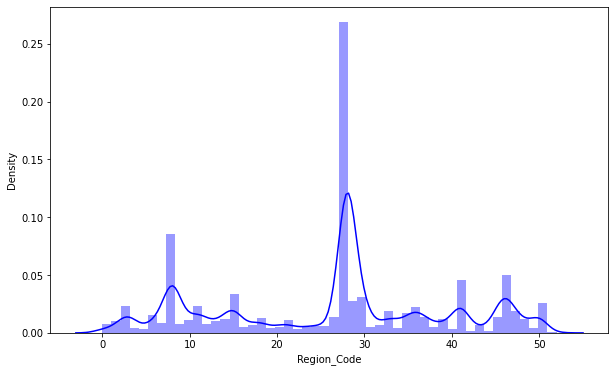

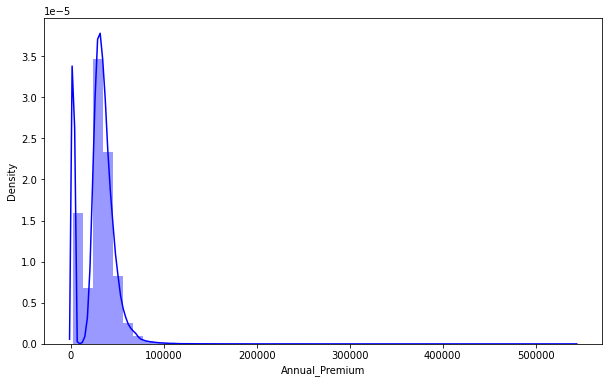

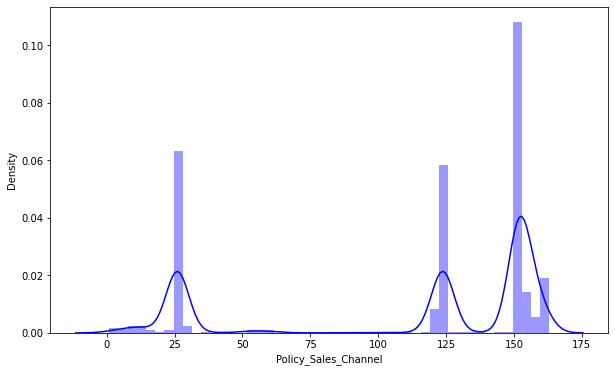

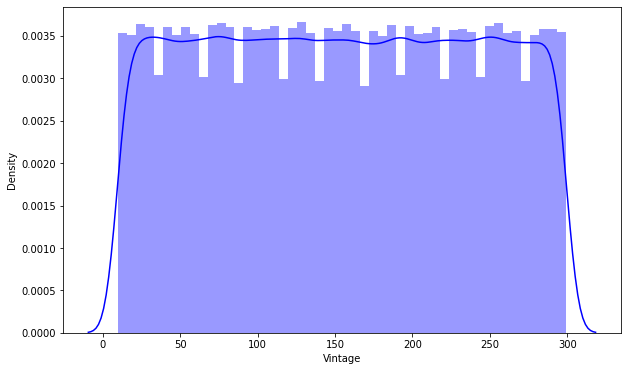

In [53]:
# plotting the numerical features
for feature in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot((health_df[feature]),color='b')
  plt.xlabel(feature)

In [54]:
#checking the outliers
Q1 = health_df.quantile(0.25)
Q3 = health_df.quantile(0.75)
IQR = Q3 - Q1

((health_df < (Q1 - 1.5 * IQR)) | (health_df > (Q3 + 1.5 * IQR))).sum()

Age                         0
Annual_Premium          10320
Driving_License           812
Gender                      0
Policy_Sales_Channel        0
Previously_Insured          0
Region_Code                 0
Response                46710
Vehicle_Age                 0
Vehicle_Damage              0
Vintage                     0
dtype: int64

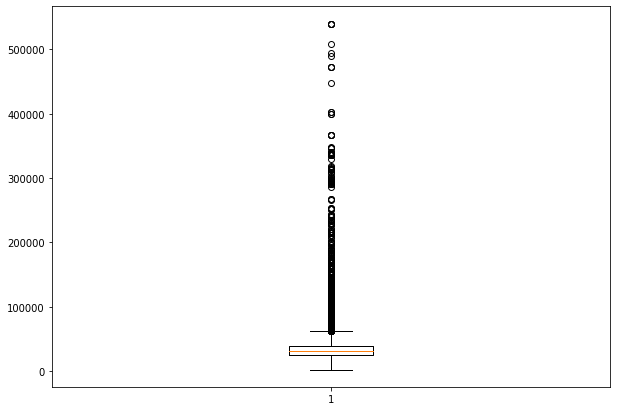

In [55]:
plt.figure(figsize=(10,7))
plt.boxplot(health_df['Annual_Premium']);

#Feature Engineering

In [56]:
# Feature encoding
health_df['Gender'] = health_df['Gender'].map({'Male':0,'Female':1})
health_df['Vehicle_Damage'] = health_df['Vehicle_Damage'].map({'No':0,'Yes':1})


In [57]:
#separating the dependent and independent variables
y=health_df['Response']
x=health_df.drop(columns='Response')

In [58]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39


###One hot encoding:

In [59]:
# Performing one hot encoding on the dependent variables
x=pd.get_dummies(x)
x.shape

(381109, 12)

In [60]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,44,1,28.0,0,1,40454.0,26.0,217,0,0,1
1,0,76,1,3.0,0,0,33536.0,26.0,183,1,0,0
2,0,47,1,28.0,0,1,38294.0,26.0,27,0,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,203,0,1,0
4,1,29,1,41.0,1,0,27496.0,152.0,39,0,1,0


In [61]:
# Merging the columns 'Vehicle_Age_1-2 Year' and 'Vehicle_Age_> 2 Years'
x['Vehicle_Age > 1 Year'] = x['Vehicle_Age_1-2 Year']+x['Vehicle_Age_> 2 Years']

In [62]:
x.drop(['Vehicle_Age_1-2 Year','Vehicle_Age_> 2 Years'],inplace=True, axis=1)

In [63]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age > 1 Year
0,0,44,1,28.0,0,1,40454.0,26.0,217,0,1
1,0,76,1,3.0,0,0,33536.0,26.0,183,0,1
2,0,47,1,28.0,0,1,38294.0,26.0,27,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,203,1,0
4,1,29,1,41.0,1,0,27496.0,152.0,39,1,0


###Feature Selection:

In [64]:
x.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age > 1 Year'],
      dtype='object')

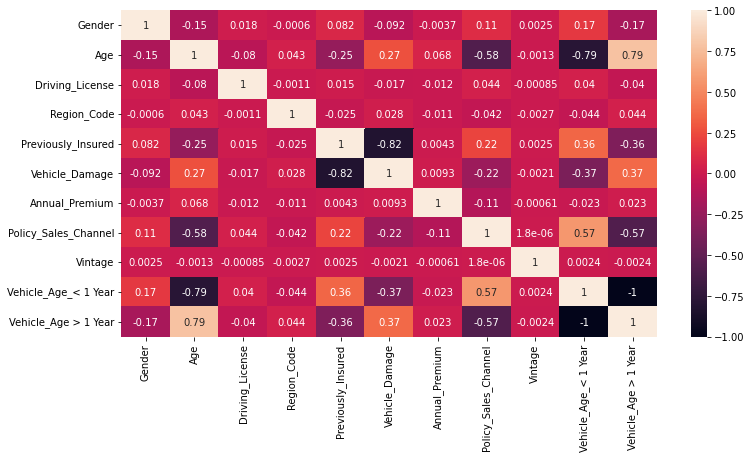

In [65]:
# plotting the heatmap.
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
sns.heatmap(x.corr(),annot=True)

* very vehical age < 1 negative corelation vehical age > 1
* very vehical age > 1  positive corelation age.
* very vehical age < 1 negative corelation vehical age
* very  age  negative corelation policyn_Sales
* vahical damage negative lorelation with previosly insured


In [66]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = x.columns
   vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
 
   return(vif)

In [67]:
calc_vif(x)

,variables,VIF
0,Gender,1.030576
1,Age,2.848315
2,Driving_License,1.007953
3,Region_Code,1.002912
4,Previously_Insured,3.153880
5,Vehicle_Damage,3.184826
6,Annual_Premium,1.019267
7,Policy_Sales_Channel,1.606819
8,Vintage,1.000026
9,Vehicle_Age_< 1 Year,229.321568


In [68]:
# dropping the features with high VIF
x.drop(['Vehicle_Age > 1 Year'],axis=1,inplace=True)

In [69]:
calc_vif(x)

,variables,VIF
0,Gender,1.904143
1,Age,18.643964
2,Driving_License,53.135971
3,Region_Code,4.957056
4,Previously_Insured,5.741540
5,Vehicle_Damage,6.304144
6,Annual_Premium,4.208088
7,Policy_Sales_Channel,8.292475
8,Vintage,4.375112
9,Vehicle_Age_< 1 Year,5.149318


In [70]:
# dropping the features with high VIF
x.drop(['Driving_License'],axis=1,inplace=True)

In [71]:
calc_vif(x)

,variables,VIF
0,Gender,1.880336
1,Age,9.525462
2,Region_Code,4.660011
3,Previously_Insured,5.106877
4,Vehicle_Damage,5.328769
5,Annual_Premium,4.033733
6,Policy_Sales_Channel,6.772963
7,Vintage,4.159940
8,Vehicle_Age_< 1 Year,4.191531


In [72]:
# copying the data for future use
X = x.copy()
Y = y.copy()

#Data Transformation

In [73]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)

#Handling Imbalanced data

###Using SMOTE Method

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


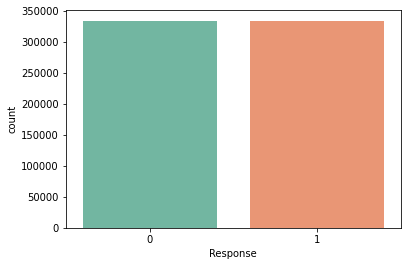

In [74]:
# Using SMOTE technique of balancing the datset
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=46, sampling_strategy=1.0)
x_smote, y_smote = sm.fit_resample(x, y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_smote)))
sns.countplot(y_smote,palette='Set2');

In [75]:
# Divivding the dataset into train and test set
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_smote, y_smote, test_size=0.2, random_state=11)

#Training a Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [78]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# # Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                    param_grid = param_dict,
                      cv = 5, verbose=2, scoring='roc_auc')

#rf_grid.fit(x_train_sm,y_train_sm)

In [79]:
# best parameters
# rf_grid.best_estimator_

In [80]:
# training on the best parameters
rf_optimal_model = RandomForestClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=50)
rf_optimal_model.fit(x_train_sm,y_train_sm)

RandomForestClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=50)

In [81]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(x_train_sm)
test_class_preds = rf_optimal_model.predict(x_test_sm)

In [82]:
# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(x_train_sm)[:,1]
test_preds = rf_optimal_model.predict_proba(x_test_sm)[:,1]

In [83]:
len(train_preds)

535038

In [84]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train_sm,train_class_preds)
test_accuracy = accuracy_score(y_test_sm,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

rf_precision = precision_score(y_test_sm, test_class_preds)
rf_recall = recall_score(y_test_sm, test_class_preds)
print("Precision:",(rf_precision))
print("Recall:",(rf_recall))

# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train_sm,train_preds)
test_auc = roc_auc_score(y_test_sm,test_preds)
print("Train ROC-AUC:",train_auc)
print("Test ROC-AUC:",test_auc)

The accuracy on train dataset is 0.8112806940815419
The accuracy on test dataset is 0.8097338516746412
Precision: 0.7362086829790383
Recall: 0.9659102792010875
Train ROC-AUC: 0.8833933493902364
Test ROC-AUC: 0.8822942373169741


In [85]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train_sm,train_class_preds)
test_cm = confusion_matrix(y_test_sm,test_class_preds )
print("Train CM:\n",train_cm,"\n")
print("Test CM:\n",test_cm)


Train CM:
 [[175500  92080]
 [  8892 258566]] 

Test CM:
 [[43651 23168]
 [ 2282 64659]]


#Logistic Regression Model

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(random_state=123)
log_reg.fit(x_train_sm, y_train_sm)

accuracy_train_logreg, accuracy_test_logreg = log_reg.score(x_train_sm, y_train_sm),log_reg.score(x_test_sm, y_test_sm)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_logreg)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_logreg))

Accuracy on Train Data : 0.783
Accuracy on Test Data  : 0.783


##Hyperparameter Tuning

In [87]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": [1e-06, 1e-05, 1e-04, 1e-03],
              "penalty": ['l1','l2'],
              "max_iter":[400,450,500]
             }

grid_cv = GridSearchCV(estimator=log_reg, param_grid=parameters, cv=3)
grid_cv.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001],
                         'max_iter': [400, 450, 500], 'penalty': ['l1', 'l2']})

In [88]:
# getting the best parameters
best_params = grid_cv.best_params_
print('Best parameters: ',best_params)

Best parameters:  {'C': 1e-05, 'max_iter': 400, 'penalty': 'l2'}


In [89]:
# getting the optimal model
lr_optimal_model = grid_cv.best_params_

In [90]:
# Making predictions on train and test data

lr_clf = LogisticRegression(**lr_optimal_model, random_state=123)
lr_clf.fit(x_train_sm, y_train_sm)

train_prediction_proba = lr_clf.predict_proba(x_train_sm)[:,1]
test_prediction_proba = lr_clf.predict_proba(x_test_sm)[:,1]
# Get the roc_auc score for train and test dataset
lr_train_auc = roc_auc_score(y_train_sm,train_prediction_proba)
lr_test_auc = roc_auc_score(y_test_sm,test_prediction_proba)
print("Train ROC-AUC:",lr_train_auc)
print("Test ROC-AUC:",lr_test_auc)

y_pred_lr = lr_clf.predict(x_test_sm)
lr_precision = precision_score(y_test_sm, y_pred_lr)
lr_recall = recall_score(y_test_sm, y_pred_lr)
print("Precision: {:.2f}%".format(lr_precision))
print("Recall: {:.2f}%".format(lr_recall))

# lr_train_acc, lr_test_acc = print_score(lr_clf)
pred_train = lr_clf.predict(x_train_sm)
train_acc = accuracy_score(y_train_sm, pred_train)
print("Train Accuracy: {:.2f}%".format(train_acc * 100))
    
pred_test = lr_clf.predict(x_test_sm)
test_acc = accuracy_score(y_test_sm, pred_test)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

Train ROC-AUC: 0.8139242178721036
Test ROC-AUC: 0.812003385062968
Precision: 0.71%
Recall: 0.98%
Train Accuracy: 78.72%
Test Accuracy: 78.64%


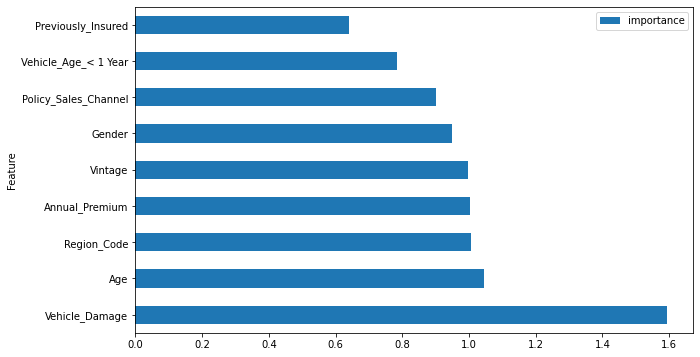

In [91]:
# calculating the Euler's Number to the power of it's coefficient to get the feature importance
import math
feature_importance = pd.DataFrame(X.columns,columns=['Feature'])
feature_importance['importance']= pow(math.e,lr_clf.coef_[0])
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

feature_importance.plot.barh(x='Feature', y='importance',figsize=(10,6));

* **Most important feature according to Logistic Regression Model is Vehicle Damage followed by Age**

#XGBClassifier

In [92]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [93]:
xgb = XGBClassifier()

In [ ]:
# Fitting the data

xgb = XGBClassifier(random_state=123,max_depth=8)
xgb.fit(x_train_sm, y_train_sm)

In [ ]:
#Print model report:
y_pred_xgb = xgb.predict(x_test_sm)
xgb_precision = precision_score(y_test_sm, y_pred_xgb)
xgb_recall = recall_score(y_test_sm, y_pred_xgb)
print("Precision: {:.2f}%".format(xgb_precision))
print("Recall: {:.2f}%".format(xgb_recall))


pred_train_xgb = xgb.predict(x_train_sm)
train_acc_xgb = accuracy_score(y_train_sm, pred_train_xgb)
print("Train Accuracy: {:.2f}%".format(train_acc_xgb * 100))
    
pred_test_xgb = xgb.predict(x_test_sm)
test_acc_xgb = accuracy_score(y_test_sm, pred_test_xgb)
print("Test Accuracy: {:.2f}%".format(test_acc_xgb * 100))


train_pred_proba = xgb.predict_proba(x_train_sm)[:,1]
xgb_auc_train = roc_auc_score(y_train_sm, train_pred_proba)
print("Train AUC:" , xgb_auc_train )

test_pred_proba = xgb.predict_proba(x_test_sm)[:,1]
xgb_auc_test = roc_auc_score(y_test_sm, test_pred_proba)
print("Test AUC:" , xgb_auc_test )

In [ ]:
# Getting the Feature importance 
plt.figure(figsize=(10,6))
sns.barplot(X.columns,xgb.feature_importances_)
plt.xticks(rotation=90)

* **Previously Insured and Vehicle Damage are most important features according to XGB Model**

#Naive-Bayes Classifier

### 1. GaussianNB Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(x_train_sm,y_train_sm)

In [ ]:
train_preds_nb = NB_model.predict(x_train_sm)
test_preds_nb = NB_model.predict(x_test_sm)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_train_sm,train_preds_nb))
print(confusion_matrix(y_test_sm,test_preds_nb))

[[158173 109407]
 [  6173 261285]]
[[39391 27428]
 [ 1534 65407]]


In [ ]:

train_acc_nb = accuracy_score(y_train_sm, train_preds_nb)
print("Train Accuracy: {:.2f}%".format(train_acc_nb * 100))

test_acc_nb = accuracy_score(y_test_sm, test_preds_nb)
print("Test Accuracy: {:.2f}%".format(test_acc_nb * 100))



nb_precision = precision_score(y_test_sm, test_preds_nb)
nb_recall = recall_score(y_test_sm, test_preds_nb)
print("Precision:",(xgb_precision))
print("Recall:", (xgb_recall))


Train Accuracy: 78.40%
Test Accuracy: 78.35%
Precision: 0.812990831366784
Recall: 0.9417994950777551


In [ ]:
print(classification_report(y_train_sm,train_preds_nb))
print("\n")
print(classification_report(y_test_sm,test_preds_nb))

train_pred_proba_nb = NB_model.predict_proba(x_train_sm)[:,1]
nb_auc_train = roc_auc_score(y_train_sm, train_pred_proba_nb)
print("Train AUC:" , nb_auc_train )

test_pred_proba_nb = NB_model.predict_proba(x_test_sm)[:,1]
nb_auc_test = roc_auc_score(y_test_sm, test_pred_proba_nb)
print("Test AUC:" , nb_auc_test )

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    267580
           1       0.70      0.98      0.82    267458

    accuracy                           0.78    535038
   macro avg       0.83      0.78      0.78    535038
weighted avg       0.83      0.78      0.78    535038



              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66819
           1       0.70      0.98      0.82     66941

    accuracy                           0.78    133760
   macro avg       0.83      0.78      0.77    133760
weighted avg       0.83      0.78      0.78    133760

Train AUC: 0.826373315075435
Test AUC: 0.8245596572322823


### 2. MultiNomial Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MN_model = MultinomialNB().fit(x_train_sm,y_train_sm)

In [ ]:
train_preds_mn = MN_model.predict(x_train_sm)
test_preds_mn = MN_model.predict(x_test_sm)

In [ ]:
print(confusion_matrix(y_train_sm,train_preds_mn))
print(confusion_matrix(y_test_sm,test_preds_mn))

[[173398  94182]
 [ 30216 237242]]
[[43265 23554]
 [ 7600 59341]]


In [ ]:
train_acc_mn = accuracy_score(y_train_sm, train_preds_mn)
print("Train Accuracy: {:.2f}%".format(train_acc_nb * 100))

test_acc_mn = accuracy_score(y_test_sm, test_preds_mn)
print("Test Accuracy: {:.2f}%".format(test_acc_nb * 100))



mn_precision = precision_score(y_test_sm, test_preds_mn)
mn_recall = recall_score(y_test_sm, test_preds_mn)
print("Precision:",(mn_precision))
print("Recall:",(mn_recall))

Train Accuracy: 78.40%
Test Accuracy: 78.35%
Precision: 0.7158574099764763
Recall: 0.8864671875233414


In [ ]:
print("Train Report")
print(classification_report(y_train_sm,train_preds_mn))
print("\n Test Report")
print(classification_report(y_test_sm,test_preds_mn))

train_pred_proba_mn = MN_model.predict_proba(x_train_sm)[:,1]
mn_auc_train = roc_auc_score(y_train_sm, train_pred_proba_mn)
print("Train AUC:" , mn_auc_train )

test_pred_proba_mn = MN_model.predict_proba(x_test_sm)[:,1]
mn_auc_test = roc_auc_score(y_test_sm, test_pred_proba_mn)
print("Test AUC:" , mn_auc_test )

Train Report
              precision    recall  f1-score   support

           0       0.85      0.65      0.74    267580
           1       0.72      0.89      0.79    267458

    accuracy                           0.77    535038
   macro avg       0.78      0.77      0.76    535038
weighted avg       0.78      0.77      0.76    535038


 Test Report
              precision    recall  f1-score   support

           0       0.85      0.65      0.74     66819
           1       0.72      0.89      0.79     66941

    accuracy                           0.77    133760
   macro avg       0.78      0.77      0.76    133760
weighted avg       0.78      0.77      0.76    133760

Train AUC: 0.8007319377596225
Test AUC: 0.7989141763983058


### 3. BernoulliNB classifier

In [ ]:
 from sklearn.naive_bayes import BernoulliNB
BN_model = BernoulliNB().fit(x_train_sm,y_train_sm)


In [ ]:
train_preds_bn = BN_model.predict(x_train_sm)
test_preds_bn = BN_model.predict(x_test_sm)

In [ ]:
print(confusion_matrix(y_train_sm,train_preds_bn))
print(confusion_matrix(y_test_sm,test_preds_bn))

[[163005 104575]
 [  7803 259655]]
[[40607 26212]
 [ 1930 65011]]


In [ ]:
train_acc_bn = accuracy_score(y_train_sm, train_preds_bn)
print("Train Accuracy: {:.2f}%".format(train_acc_nb * 100))

test_acc_bn = accuracy_score(y_test_sm, test_preds_bn)
print("Test Accuracy: {:.2f}%".format(test_acc_nb * 100))



bn_precision = precision_score(y_test_sm, test_preds_bn)
bn_recall = recall_score(y_test_sm, test_preds_bn)
print("Precision:",(bn_precision))
print("Recall:",(bn_recall))

Train Accuracy: 78.40%
Test Accuracy: 78.35%
Precision: 0.7126601843833243
Recall: 0.9711686410421118


In [ ]:
print("Train Report")
print(classification_report(y_train_sm,train_preds_bn))
print("\n Test Report")
print(classification_report(y_test_sm,test_preds_bn))

train_pred_proba_bn = BN_model.predict_proba(x_train_sm)[:,1]
bn_auc_train = roc_auc_score(y_train_sm, train_pred_proba_bn)
print("Train AUC:" , bn_auc_train )

test_pred_proba_bn = BN_model.predict_proba(x_test_sm)[:,1]
bn_auc_test = roc_auc_score(y_test_sm, test_pred_proba_bn)
print("Test AUC:" , bn_auc_test )

Train Report
              precision    recall  f1-score   support

           0       0.95      0.61      0.74    267580
           1       0.71      0.97      0.82    267458

    accuracy                           0.79    535038
   macro avg       0.83      0.79      0.78    535038
weighted avg       0.83      0.79      0.78    535038


 Test Report
              precision    recall  f1-score   support

           0       0.95      0.61      0.74     66819
           1       0.71      0.97      0.82     66941

    accuracy                           0.79    133760
   macro avg       0.83      0.79      0.78    133760
weighted avg       0.83      0.79      0.78    133760

Train AUC: 0.8283965979700475
Test AUC: 0.8270762610671794


#Conclusion:

###Let's summarise the results from all the models trained.

In [ ]:
Results = pd.DataFrame()
Results['Model Name'] = ['Logistic Regression','RandomForest Classifier','XGBClassifier','GaussianNB Classifier',
                         'Multinomial Classifier','BernoulliNB Classifier']
Results['Precision'] = [lr_precision,rf_precision,xgb_precision,nb_precision,mn_precision,bn_precision]
Results['Recall'] = [lr_recall,rf_recall,xgb_recall,nb_recall,mn_recall,bn_recall]
Results['Train Accuracy'] = [train_acc,train_accuracy,train_acc_xgb,train_acc_nb,train_acc_mn,train_acc_bn]
Results['Test Accuracy'] = [test_acc,test_accuracy,test_acc_xgb,test_acc_nb,test_acc_mn,test_acc_bn]
Results['Train ROC-AUC'] = [lr_train_auc,train_auc,xgb_auc_train,nb_auc_train,mn_auc_train,bn_auc_train] 
Results['Test ROC-AUC'] = [lr_test_auc,test_auc,xgb_auc_test,nb_auc_test,mn_auc_test,bn_auc_test]
Results

,Model Name,Precision,Recall,Train Accuracy,Test Accuracy,Train ROC-AUC,Test ROC-AUC
0,Logistic Regression,0.708167,0.975053,0.787157,0.786423,0.813924,0.812003
1,RandomForest Classifier,0.736209,0.965910,0.811281,0.809734,0.883393,0.882294
2,XGBClassifier,0.812991,0.941799,0.866645,0.862455,0.958584,0.956239
3,GaussianNB Classifier,0.704551,0.977084,0.783978,0.783478,0.826373,0.824560
4,Multinomial Classifier,0.715857,0.886467,0.767497,0.767090,0.800732,0.798914
5,BernoulliNB Classifier,0.712660,0.971169,0.789963,0.789608,0.828397,0.827076


* **Some important inferences have been made from the EDA and have been incurred below every visualization.**

* **After training the models and comparing the results, it can be said that the XGBoost Classifier model has performed better than the other models.**

*

* **Vehicle damage and previously insured came out as the most important features for the model.**
* **This means our model can improve our responce rate for predicting customers who interested in subscribing Vinehicle insurance**

*
